In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.ndimage import shift

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.int8)

In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [4]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

In [5]:
def shift_image(image, direction):
    image = image.reshape(28, 28)
    
    if direction == "left":
        shifted = shift(image, [0, -1], cval=0)
    elif direction == "right":
        shifted = shift(image, [0, 1], cval=0)
    elif direction == "up":
        shifted = shift(image, [-1, 0], cval=0)
    elif direction == "down":
        shifted = shift(image, [1, 0], cval=0)
    else:
        raise ValueError("Direction must be left, right, up, or down")
        
    return shifted.reshape(784)

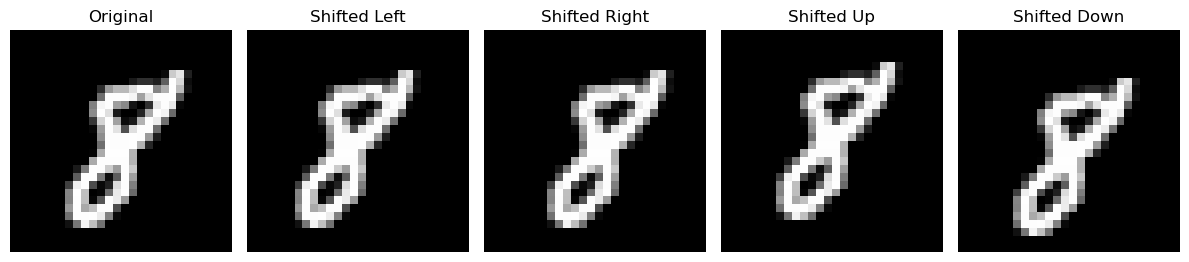

In [7]:
sample_index = np.where(y_train == 8)[0][0]
original_image = X_train[sample_index]

# Generate shifted images
shifted_left = shift_image(original_image, "left")
shifted_right = shift_image(original_image, "right")
shifted_up = shift_image(original_image, "up")
shifted_down = shift_image(original_image, "down")

# Plot images
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

images = [
    original_image,
    shifted_left,
    shifted_right,
    shifted_up,
    shifted_down
]

titles = ["Original", "Shifted Left", "Shifted Right", "Shifted Up", "Shifted Down"]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [6]:
X_train_augmented = [img for img in X_train]
y_train_augmented = [label for label in y_train_8]

directions = ["left", "right", "up", "down"]

for img, label in zip(X_train, y_train_8):
    for direction in directions:
        X_train_augmented.append(shift_image(img, direction))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [8]:
sgd_baseline = SGDClassifier(random_state=42)
sgd_baseline.fit(X_train, y_train_8)

y_pred_baseline = sgd_baseline.predict(X_test)
baseline_accuracy = accuracy_score(y_test_8, y_pred_baseline)

baseline_accuracy

0.9391

In [9]:
sgd_augmented = SGDClassifier(random_state=42)
sgd_augmented.fit(X_train_augmented, y_train_augmented)

y_pred_augmented = sgd_augmented.predict(X_test)
augmented_accuracy = accuracy_score(y_test_8, y_pred_augmented)

augmented_accuracy

0.9363

In [10]:
print("Baseline Confusion Matrix:")
print(confusion_matrix(y_test_8, y_pred_baseline))

print("\nAugmented Confusion Matrix:")
print(confusion_matrix(y_test_8, y_pred_augmented))


Baseline Confusion Matrix:
[[8786  240]
 [ 369  605]]

Augmented Confusion Matrix:
[[8598  428]
 [ 209  765]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_augmented, y_train_augmented)

y_pred_sgd = sgd_clf.predict(X_test)

sgd_results = {
    "Accuracy": accuracy_score(y_test_8, y_pred_sgd),
    "Precision": precision_score(y_test_8, y_pred_sgd),
    "Recall": recall_score(y_test_8, y_pred_sgd),
    "F1": f1_score(y_test_8, y_pred_sgd)
}

sgd_results

{'Accuracy': 0.9363,
 'Precision': 0.6412405699916177,
 'Recall': 0.7854209445585215,
 'F1': 0.7060452238117213}

In [13]:
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_augmented, y_train_augmented)

y_pred_lr = log_reg.predict(X_test)

lr_results = {
    "Accuracy": accuracy_score(y_test_8, y_pred_lr),
    "Precision": precision_score(y_test_8, y_pred_lr),
    "Recall": recall_score(y_test_8, y_pred_lr),
    "F1": f1_score(y_test_8, y_pred_lr)
}

lr_results


Exception ignored in: <function ResourceTracker.__del__ at 0x104255d00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1024e5d00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1030a1d00>
Traceback (most recent call last

{'Accuracy': 0.956,
 'Precision': 0.8423076923076923,
 'Recall': 0.6745379876796714,
 'F1': 0.7491448118586089}

In [14]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train_augmented, y_train_augmented)

y_pred_rf = rf_clf.predict(X_test)

rf_results = {
    "Accuracy": accuracy_score(y_test_8, y_pred_rf),
    "Precision": precision_score(y_test_8, y_pred_rf),
    "Recall": recall_score(y_test_8, y_pred_rf),
    "F1": f1_score(y_test_8, y_pred_rf)
}

rf_results

{'Accuracy': 0.991,
 'Precision': 0.996629213483146,
 'Recall': 0.9106776180698152,
 'F1': 0.9517167381974249}

In [15]:
import pandas as pd

results_df = pd.DataFrame.from_dict(
    {
        "SGD": sgd_results,
        "Logistic Regression": lr_results,
        "Random Forest": rf_results
    },
    orient="index"
)

results_df

,Accuracy,Precision,Recall,F1
SGD,0.9363,0.641241,0.785421,0.706045
Logistic Regression,0.9560,0.842308,0.674538,0.749145
Random Forest,0.9910,0.996629,0.910678,0.951717


Exception ignored in: <function ResourceTracker.__del__ at 0x104abdd00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104be9d00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In this project, I worked with the MNIST dataset to improve how well models classify the digit 8, which is often misclassified due to small shifts in handwriting. To fix this, I used data augmentation by creating shifted versions of each training image, allowing the models to see more realistic variations of the same digit. I then trained multiple models, including an SGD classifier, Logistic Regression, and a Random Forest, and tested them on the original test set. Overall, the augmented data helped all models perform better, with the Random Forest showing the biggest improvement, proving that data augmentation is an effective way to improve model performance and generalization.